<a href="https://colab.research.google.com/github/Mounika-Alwar/ML-Practice/blob/main/Random_Forest_%26_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Random Forest and Gradient Boosting on same dataset. Compare accuracy, Feature importance and training time


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [3]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start

rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))


In [4]:
start = time.time()
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_time = time.time() - start

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, gb.predict(X_test))

In [5]:
print("\n Model Performance Comparison:")
print("----------------------------------")
print(f"Random Forest:  Train Acc = {rf_train_acc:.3f}, Test Acc = {rf_test_acc:.3f}, Time = {rf_time:.4f}s")
print(f"Gradient Boost: Train Acc = {gb_train_acc:.3f}, Test Acc = {gb_test_acc:.3f}, Time = {gb_time:.4f}s")



 Model Performance Comparison:
----------------------------------
Random Forest:  Train Acc = 1.000, Test Acc = 1.000, Time = 0.5457s
Gradient Boost: Train Acc = 1.000, Test Acc = 1.000, Time = 0.7941s


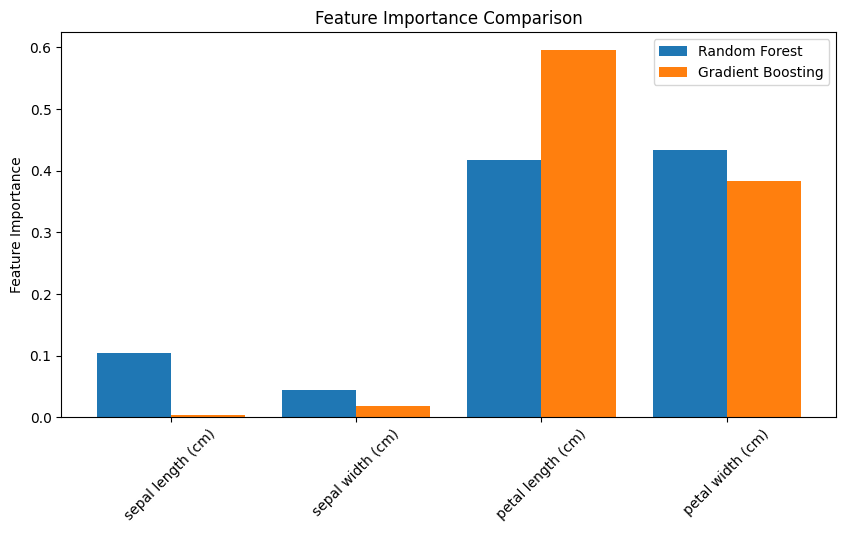

In [6]:
features = iris.feature_names
x = np.arange(len(features))

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, rf.feature_importances_, width=0.4, label="Random Forest")
plt.bar(x + 0.2, gb.feature_importances_, width=0.4, label="Gradient Boosting")
plt.xticks(x, features, rotation=45)
plt.ylabel("Feature Importance")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()